In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
data = pd.read_csv("Housedata.csv")

In [118]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [119]:
data.drop(['date'],axis=1,inplace=True)

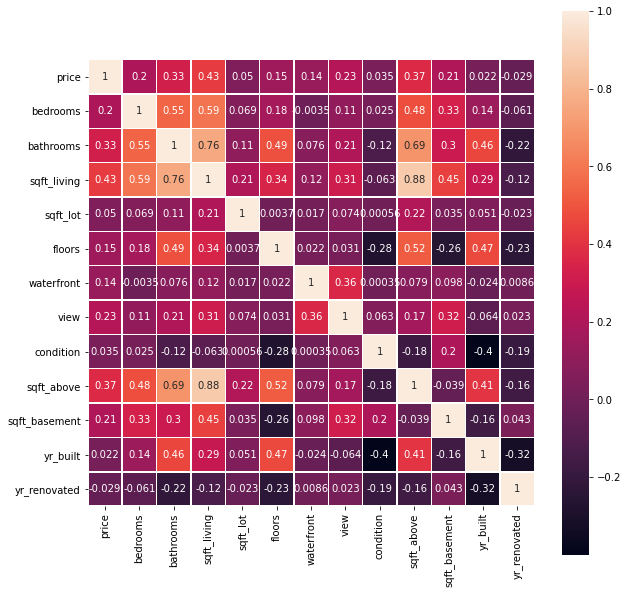

In [120]:
_, graph = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot = True, linewidth =.6, ax=graph, square=True)

## Observation
from above observation, we can conclude that features- sqft_living and sqft_above have a correlation greater
than rest, i.e. 0.88, therefore we can drop them.

In [121]:
data.drop(["sqft_living"], axis=1,inplace=True)

In [122]:
data.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [123]:
from sklearn.feature_selection import SelectKBest, chi2

In [124]:
data.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [125]:
x=data.iloc[:,1:]
y=data.iloc[:,0:1]

In [126]:
x.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.0,1.50,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5.0,2.50,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,3.0,2.00,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,3.0,2.25,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,4.0,2.50,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [127]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
x['street']= label_encoder.fit_transform(x['street'])
x['street'].unique()

array([1522, 3899, 2291, ..., 4033, 3498, 1514])

In [128]:
x['city']= label_encoder.fit_transform(x['city'])
x['city'].unique()
x['statezip']= label_encoder.fit_transform(x['statezip'])
x['statezip'].unique()
x['country']= label_encoder.fit_transform(x['country'])
x['country'].unique()
y['price'] = y['price'].astype(int)

In [129]:
select = SelectKBest(score_func=chi2, k=10)
z = select.fit_transform(x,y)
print("After selecting best 10 features:", z.shape)

After selecting best 10 features: (4600, 10)


In [130]:
from numpy import array
filter = select.get_support()
features = array(x.columns)
print("All features:")
print(features)
print("Selected best 10:")
print(features[filter])

All features:
['bedrooms' 'bathrooms' 'sqft_lot' 'floors' 'waterfront' 'view'
 'condition' 'sqft_above' 'sqft_basement' 'yr_built' 'yr_renovated'
 'street' 'city' 'statezip' 'country']
Selected best 10:
['sqft_lot' 'waterfront' 'view' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'street' 'city' 'statezip']


In [137]:
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [143]:
#selecting the independent and independent variables 

data.dropna(axis=0, subset=['price'], inplace=True)

y = data.price
X = data.drop(['price'], axis=1).select_dtypes(exclude=['object'])

In [146]:
# splitting the data for training and testing and cleaning it using imputation 

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.fit_transform(test_X)

In [147]:
# making predictions using the Decision Tree algorithm 

decision_model = DecisionTreeRegressor()  
decision_model.fit(train_X, train_y) 
predicted_decision_trees = decision_model.predict(test_X)
print ("Mean Absolute Error using Decision Tress :", mean_absolute_error(test_y, predicted_decision_trees))

Mean Absolute Error using Decision Tress : 250848.5226900591


In [148]:
# making predictions using the Random Forest algorithm 

forest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
forest_model.fit(train_X, train_y )
predicted_random_forest = forest_model.predict(test_X)
print("Mean Absolute Error using Random Forest:", mean_absolute_error(test_y, predicted_random_forest))

Mean Absolute Error using Random Forest: 182589.22915663983


In [149]:
# making predictions using the XGBoost algorithm 

xg_model = XGBRegressor(n_estimators=100)
xg_model.fit(train_X, train_y)
predicted_XGBoost = xg_model.predict(test_X)
print("Mean Absolute Error using XGBoost: ", mean_absolute_error(test_y, predicted_XGBoost))

Mean Absolute Error using XGBoost:  194164.1240678787


As evident from the above metrics, we can conclude that using a combination of Decision Trees (Random Forest) can prove to be very useful in bringing down the errors (increaing accuracy). Also, further improvement in the results can be made using some kind of boosting algorithm.